# Task3 - To explore Unsupervised Learning

### From the given Iris Datasets, predict the optimum number of clusters

In [2]:
# Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
# load the Iris Datasets

iris_df = pd.read_csv('../Datasets/Iris.csv')

In [4]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_df.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

So each spicies has 50 data.

## Exploratory Data Analysis

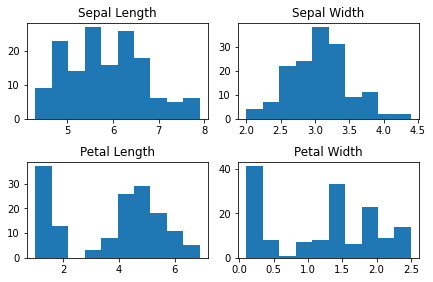

In [7]:
n_bins = 10
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(iris_df['SepalLengthCm'], bins = n_bins);
axs[0,0].set_title('Sepal Length');
axs[0,1].hist(iris_df['SepalWidthCm'], bins = n_bins);
axs[0,1].set_title('Sepal Width');
axs[1,0].hist(iris_df['PetalLengthCm'], bins = n_bins);
axs[1,0].set_title('Petal Length');
axs[1,1].hist(iris_df['PetalWidthCm'], bins = n_bins);
axs[1,1].set_title('Petal Width');
# add some spacing between subplots
fig.tight_layout(pad=1.0);


Note that for both petal_length and petal_width, there seems to be a group of data points that have smaller values than the others, suggesting that there might be different groups in this data.

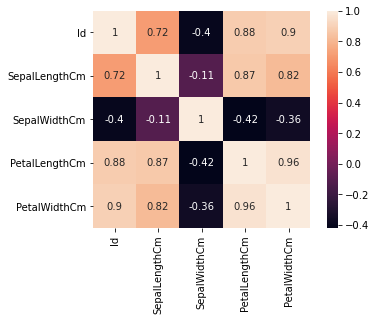

In [8]:
#Correlation Matrix
corrmat = iris_df.corr()
sns.heatmap(corrmat, annot = True, square = True);

### to determine the optimum numbers of clusters for KMeans

In [31]:
X,_ = iris_df.iloc[:,[1,2,3,4]].values,iris_df.iloc[:,5].values


We try different values for k and we will see the reduction in variations within each cluster

In [32]:
# Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


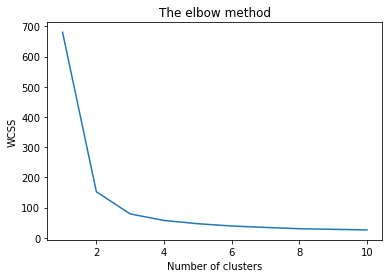

In [33]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


The total variation within each cluster is less than when k=3 so optimum number of clusters should be 3 for this iris data.

In [34]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

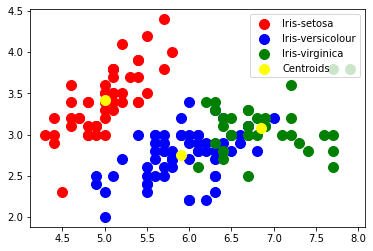

In [41]:
# Visualising the clusters - On the 2nd and 3rd column
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')
plt.savefig('output/2.clsters.png', dpi=300, bbox_inches='tight')
